___

# Machine Learning in Geosciences ] 
Department of Applied Geoinformatics and Carthography, Charles University

Lukas Brodsky lukas.brodsky@natur.cuni.cz


## Deep Learning - Semantic Segmentation with CNN

Task: This notebook focusses on semantic CNN model with PyTorch https://pytorch.org on example of simulated images containing 3 shapes at random position. 
Architecture: Segmentation CNN  

**Tasks**: 
    
    1. Develop full segmentaiotn CNN workflow, including implementing the model and modelling parameters.  
    
    2. Train the model, plot training and testing loss evolution 
    
    3. Change level of noise from 0.1 to 0.5 and 0.9 and evaluate learning.  


#### Architecture inspiration 



#### Main steps in the modelling workflow 
1. Load dataset
2. Make dataset iterable
3. Create model class
4. Instantiate model class
5. Instantiate loss class
6. Instantiate optimizer class
7. Train model

In [ ]:
import numpy as np
np.random.seed(42) 
import matplotlib.pyplot as plt
import time 

# PyTorch imports 
import torch
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models
from torch.autograd import Variable
import torch.nn.functional as F

### Simulated data 

In [ ]:
# To simulate data
from simulate_images import generate_image_shapes

In [ ]:
# TEST the data 
height, width, count = 32, 32, 9
noise = 0.0
X, Y, y_label = generate_image_shapes(height, width, count, noise)

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
y_label

In [ ]:
np.unique(y_label)

In [ ]:
image_no=3
print(f'Label: {y_label[image_no]}')
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X[image_no][0,:,:])
ax2.imshow(Y[image_no][0,:,:], cmap='gray')
fig.tight_layout()

In [ ]:
plt.figure(figsize=(10,10)) 

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X[i][0,:,:])


### Step 1. Load dataset

In [ ]:
class SimDataset(Dataset):
    def __init__(self, height, width, count, noise, transform=None):
        self.input_images, self.target_masks, self.target_labels= generate_image_shapes(height, width, count, noise)
        self.transform = transform

    def __len__(self):
        return len(self.input_images)

    def __getitem__(self, idx):
        image = self.input_images[idx]
        mask = self.target_masks[idx]
        label= self.target_labels[idx] 
        if self.transform:
            image = self.transform(image)

        return [image, mask, label]


### Step 2. Make dataset iterable

In [ ]:
def get_data_loaders(height, width, noise, train_size, test_size, batch_size=5):

    # simulated data 
    train_set = SimDataset(height, width, train_size, noise) 
    test_set = SimDataset(height, width, test_size, noise) 

    # make it PyTorch iterator DataLoader() 
    train_dataloader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
    test_dataloader = DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=0)

    return train_dataloader, test_dataloader

In [ ]:
### Prepare data in dataloader (iterator)
batch_size = 20
height, width = 32, 32 
noise = 0.0
train_dataloader, test_dataloader = get_data_loaders(height, width, noise, train_size=500, test_size=500, 
                                                     batch_size=batch_size)

### Step 3: Define Model 

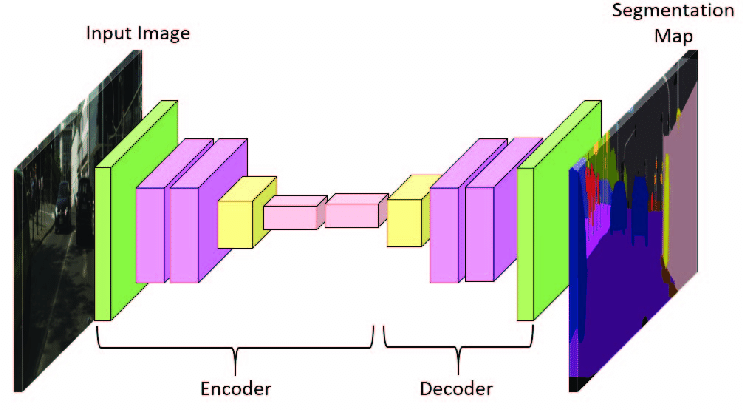

In [ ]:
# CNN Model - ligh veriosn 

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        
        # Encoder (1, 64), (64, 128)
        pass        
        pass 
    
        # Decoder (128, 64), (64, 1)
        pass
        pass 
        
        # Max pooling indices
        # pool_indices 
        pass 
        # unpool 
        pass 
        
    def forward(self, x):
        # Encoder
        # x1, indices1 = pool(relu(conv(x)))
        pass
        # x2, indices2 
        
        # Decoder 
        # x = relu(conv(unpool(x, indices)))
        pass
        # x = conv(unpool(x, indices1))
        pass 
        
        return x


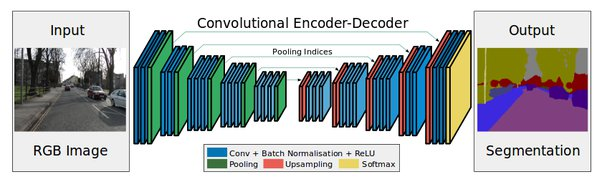

In [ ]:
# Model 
class SegNet(nn.Module):
    def __init__(self, input_nbr, label_nbr):
        super(SegNet, self).__init__()

        batchNorm_momentum = 0.1

        self.conv11 = nn.Conv2d(input_nbr, 64, kernel_size=3, padding=1)
        self.bn11 = nn.BatchNorm2d(64, momentum= batchNorm_momentum)
        self.conv12 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn12 = nn.BatchNorm2d(64, momentum= batchNorm_momentum)

        self.conv21 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn21 = nn.BatchNorm2d(128, momentum= batchNorm_momentum)
        self.conv22 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn22 = nn.BatchNorm2d(128, momentum= batchNorm_momentum)

        self.conv31 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn31 = nn.BatchNorm2d(256, momentum= batchNorm_momentum)
        self.conv32 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn32 = nn.BatchNorm2d(256, momentum= batchNorm_momentum)
        self.conv33 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn33 = nn.BatchNorm2d(256, momentum= batchNorm_momentum)

        self.conv41 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn41 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv42 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn42 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv43 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn43 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)

        self.conv51 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn51 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv52 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn52 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv53 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn53 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)

        self.conv53d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn53d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv52d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn52d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv51d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn51d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)

        self.conv43d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn43d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv42d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn42d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv41d = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.bn41d = nn.BatchNorm2d(256, momentum= batchNorm_momentum)

        self.conv33d = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn33d = nn.BatchNorm2d(256, momentum= batchNorm_momentum)
        self.conv32d = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn32d = nn.BatchNorm2d(256, momentum= batchNorm_momentum)
        self.conv31d = nn.Conv2d(256,  128, kernel_size=3, padding=1)
        self.bn31d = nn.BatchNorm2d(128, momentum= batchNorm_momentum)

        self.conv22d = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn22d = nn.BatchNorm2d(128, momentum= batchNorm_momentum)
        self.conv21d = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.bn21d = nn.BatchNorm2d(64, momentum= batchNorm_momentum)

        self.conv12d = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn12d = nn.BatchNorm2d(64, momentum= batchNorm_momentum)
        self.conv11d = nn.Conv2d(64, label_nbr, kernel_size=3, padding=1)


    def forward(self, x):

        # Stage 1
        x11 = F.relu(self.bn11(self.conv11(x)))
        x12 = F.relu(self.bn12(self.conv12(x11)))
        x1p, id1 = F.max_pool2d(x12,kernel_size=2, stride=2,return_indices=True)

        # Stage 2
        x21 = F.relu(self.bn21(self.conv21(x1p)))
        x22 = F.relu(self.bn22(self.conv22(x21)))
        x2p, id2 = F.max_pool2d(x22,kernel_size=2, stride=2,return_indices=True)

        # Stage 3
        x31 = F.relu(self.bn31(self.conv31(x2p)))
        x32 = F.relu(self.bn32(self.conv32(x31)))
        x33 = F.relu(self.bn33(self.conv33(x32)))
        x3p, id3 = F.max_pool2d(x33,kernel_size=2, stride=2,return_indices=True)

        # Stage 4
        x41 = F.relu(self.bn41(self.conv41(x3p)))
        x42 = F.relu(self.bn42(self.conv42(x41)))
        x43 = F.relu(self.bn43(self.conv43(x42)))
        x4p, id4 = F.max_pool2d(x43,kernel_size=2, stride=2,return_indices=True)

        # Stage 5
        x51 = F.relu(self.bn51(self.conv51(x4p)))
        x52 = F.relu(self.bn52(self.conv52(x51)))
        x53 = F.relu(self.bn53(self.conv53(x52)))
        x5p, id5 = F.max_pool2d(x53,kernel_size=2, stride=2,return_indices=True)


        # Stage 5d
        x5d = F.max_unpool2d(x5p, id5, kernel_size=2, stride=2)
        x53d = F.relu(self.bn53d(self.conv53d(x5d)))
        x52d = F.relu(self.bn52d(self.conv52d(x53d)))
        x51d = F.relu(self.bn51d(self.conv51d(x52d)))

        # Stage 4d
        x4d = F.max_unpool2d(x51d, id4, kernel_size=2, stride=2)
        x43d = F.relu(self.bn43d(self.conv43d(x4d)))
        x42d = F.relu(self.bn42d(self.conv42d(x43d)))
        x41d = F.relu(self.bn41d(self.conv41d(x42d)))

        # Stage 3d
        x3d = F.max_unpool2d(x41d, id3, kernel_size=2, stride=2)
        x33d = F.relu(self.bn33d(self.conv33d(x3d)))
        x32d = F.relu(self.bn32d(self.conv32d(x33d)))
        x31d = F.relu(self.bn31d(self.conv31d(x32d)))

        # Stage 2d
        x2d = F.max_unpool2d(x31d, id2, kernel_size=2, stride=2)
        x22d = F.relu(self.bn22d(self.conv22d(x2d)))
        x21d = F.relu(self.bn21d(self.conv21d(x22d)))

        # Stage 1d
        x1d = F.max_unpool2d(x21d, id1, kernel_size=2, stride=2)
        x12d = F.relu(self.bn12d(self.conv12d(x1d)))
        x11d = self.conv11d(x12d)

        return x11d

### Step 4: Instantiate Model Class

In [ ]:
# instance 
pass 

### Step 5: Initiate Loss Class

In [ ]:
# loss function 
# nn.BCEWithLogitsLoss() This loss combines a Sigmoid layer and the BCELoss in one single class. 
# This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, 
# by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.
# criterion = nn.BCEWithLogitsLoss() 

In [ ]:
# compute IoU (Jaccard Index) for semantic segmentation 
def iou(pred, target, n_classes = 2):
    ious = []
    pred = pred.view(-1)
    target = target.view(-1)
    
    # Ignore IoU for background class ("0")
    for cls in xrange(1, n_classes):  # This goes from 1:n_classes-1 -> class "0" is ignored
        pred_inds = pred == cls
        target_inds = target == cls
        intersection = (pred_inds[target_inds]).long().sum().data.cpu()[0]  # Cast to long to prevent overflows
        union = pred_inds.long().sum().data.cpu()[0] + target_inds.long().sum().data.cpu()[0] - intersection
    if union == 0:
        ious.append(float('nan'))  # If there is no ground truth, do not include in evaluation
    else:
        ious.append(float(intersection) / float(max(union, 1)))
        
    return np.array(ious)

### Step 6: Instantiate Optimizer Class

In [ ]:
# optimizer 
# learning_rate 
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Step: 7. Train model

In [ ]:
# Step 7: Train Model


# training setup 
# num_epochs
pass 

# loss history
# train_loss, test_loss
pass 

# 
# for epoch in range(num_epochs):
    # for phase in ['train', 'test']:
        # if phase == 'train':
            # model.train(True)  # Set trainind mode = true
            # dataloader = train_dataloader
        # else:
            # model.train(False)  # Set model to evaluate mode
            # dataloader = test_dataloader

        # step = 0
        # iterate over data
        # for x, masks, y in dataloader:
            # step += 1
            # convert x, masks to Variable with gradients 
            pass 
            pass 

            # forward pass
            # if phase == 'train':
                # zero the gradients zero_grad() on optimizer 
                pass
                # calcualte model output 
                pass
                # calculate loss 
                pass 

                # the backward pass frees the graph memory, so there is no 
                # need for torch.no_grad in this training pass
                # backpropagation backward() on loss 
                pass
                # optimization step()
                pass 


            else:
                # testing 
                # with torch.no_grad():
                    # calculate model outputs on test images 
                    pass 
                    # calculate loss on outputs and masks 
                    pass 
            
        if phase=='train': 
            # append train loss 
            pass 
            
        else: 
            # append test loss 
            pass 
            # print both 


print('---')
# time_elapsed = time.time() - start
# print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))        

#### Plot training and testing evolution 

In [ ]:
pass